In [1]:
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from models.LogisticRegression import LogisticRegression

In [2]:
# Load iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Use only two classes: Setosa and Versicolour
iris_df = iris_df[iris_df['target'] < 2]
X = iris_df.drop('target', axis=1).values
y = iris_df['target'].values

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [4]:
# Initialize our custom Logistic Regression model
log_reg = LogisticRegression(learning_rate=0.1, n_iterations=5000, l1_lambda=0.01, l2_lambda=0.01, early_stopping=True)

# Train the model
log_reg.fit(X_train_scaled, y_train, X_val_scaled, y_val)

# Predict on validation set
y_pred = log_reg.predict(X_val_scaled)

# Print classification report
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


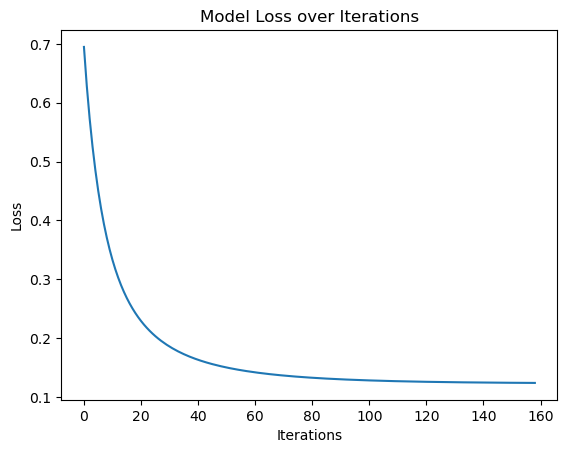

In [5]:
plt.plot(log_reg.losses)
plt.title('Model Loss over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [6]:
print(log_reg.losses)

[0.6948801126810322, 0.6282616673138539, 0.5729934123009748, 0.5257575673864793, 0.4852395115929712, 0.4503283294023583, 0.4200990002946011, 0.3937879536622611, 0.3707675971079885, 0.35052271184828887, 0.33262990739437504, 0.31674038147026506, 0.302565767779515, 0.28986666881228834, 0.27844343129972005, 0.2681287508193244, 0.2587817474164063, 0.25028321478032683, 0.2425318019004147, 0.2354409346574486, 0.22893632486248977, 0.22295394651333625, 0.217438384638585, 0.2123414822400614, 0.20762122661616003, 0.20324082867412685, 0.19916795846969013, 0.19537410774526254, 0.19183405614187896, 0.18852542239957887, 0.18542828551819981, 0.1825248637433363, 0.17979924153862858, 0.1772371365353872, 0.17482569991420782, 0.17255334484850648, 0.17040959858726296, 0.16838497452083476, 0.16647086119635043, 0.16465942575681586, 0.16294352969344678, 0.16131665514184987, 0.15977284023378624, 0.1583066222487084, 0.15691298750213128, 0.155587327068444, 0.15432539756983135, 0.15312328637527295, 0.151977380647

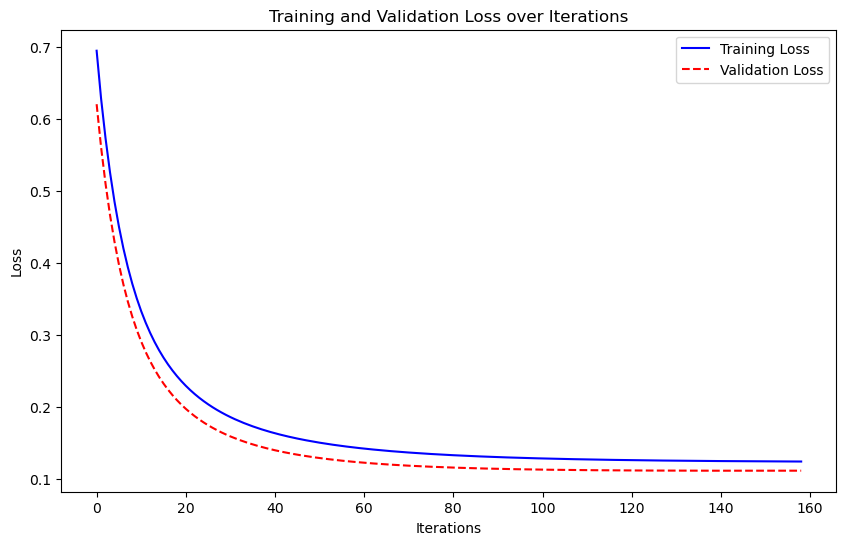

In [7]:
# Plotting Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(log_reg.losses, label='Training Loss', color='blue')
if log_reg.val_losses:
    plt.plot(log_reg.val_losses, label='Validation Loss', color='red', linestyle='dashed')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Iterations')
plt.legend()
plt.show()

In [8]:
# Extract final training and validation loss values
final_train_loss = log_reg.losses[-1]
final_val_loss = log_reg.val_losses[-1] if log_reg.val_losses else None

# Loss values at certain milestones
milestones = [0, len(log_reg.losses) // 4, len(log_reg.losses) // 2, 3 * len(log_reg.losses) // 4, -1]
train_milestone_losses = [log_reg.losses[i] for i in milestones]
val_milestone_losses = [log_reg.val_losses[i] for i in milestones] if log_reg.val_losses else []

# Difference between final training and validation loss
loss_difference = final_val_loss - final_train_loss if final_val_loss is not None else None

# Rate of change
train_loss_change = log_reg.losses[-1] - log_reg.losses[0]
val_loss_change = log_reg.val_losses[-1] - log_reg.val_losses[0] if log_reg.val_losses else None

# Find the inflection point (if any)
inflection_point = None
if log_reg.val_losses:
    for i in range(1, len(log_reg.val_losses)):
        if log_reg.val_losses[i] > log_reg.val_losses[i - 1] and log_reg.losses[i] < log_reg.losses[i - 1]:
            inflection_point = i
            break

# Display the metrics
print(f"Final Training Loss: {final_train_loss}")
print(f"Final Validation Loss: {final_val_loss}")
print("\nTraining Losses at Milestones:")
for i, loss in zip(milestones, train_milestone_losses):
    print(f"Iteration {i}: {loss}")
print("\nValidation Losses at Milestones:")
for i, loss in zip(milestones, val_milestone_losses):
    print(f"Iteration {i}: {loss}")
print(f"\nDifference between Final Training and Validation Loss: {loss_difference}")
print(f"\nTraining Loss Rate of Change: {train_loss_change}")
print(f"Validation Loss Rate of Change: {val_loss_change}")
print(f"\nInflection Point at Iteration: {inflection_point}")

Final Training Loss: 0.12364295244643098
Final Validation Loss: 0.1109035705893304

Training Losses at Milestones:
Iteration 0: 0.6948801126810322
Iteration 39: 0.16465942575681586
Iteration 79: 0.13273402406432094
Iteration 119: 0.12562507247927673
Iteration -1: 0.12364295244643098

Validation Losses at Milestones:
Iteration 0: 0.6205316576900828
Iteration 39: 0.14073758134720238
Iteration 79: 0.11542216204073254
Iteration 119: 0.11124048299983098
Iteration -1: 0.1109035705893304

Difference between Final Training and Validation Loss: -0.012739381857100579

Training Loss Rate of Change: -0.5712371602346012
Validation Loss Rate of Change: -0.5096280871007524

Inflection Point at Iteration: 147


This assures that our implemented model did not exhibit overfitting, thereby serving as a robust indicator of its capabilities.